In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [56]:
xls = 'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls'
nutri = pd.read_excel(xls)

# 1.2 Structuring Features According to Type

In [57]:
nutri

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,151,58,72,4,3,1,4,5,6
1,2,1,1,1,162,60,68,5,2,5,5,1,4
2,2,1,0,4,162,75,78,3,1,5,2,5,4
3,2,1,0,0,154,45,91,0,4,4,0,3,2
4,2,1,2,1,154,50,65,5,3,5,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2,1,0,1,160,73,74,4,3,5,5,1,6
222,2,2,0,3,163,62,68,4,3,4,4,1,3
223,1,2,0,2,170,74,71,4,3,4,4,1,3
224,2,1,0,2,154,45,77,4,3,3,5,3,5


In [58]:
nutri.head(3)

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,151,58,72,4,3,1,4,5,6
1,2,1,1,1,162,60,68,5,2,5,5,1,4
2,2,1,0,4,162,75,78,3,1,5,2,5,4


In [59]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


In [60]:
DICT = {1: 'Male', 2: 'Female'}
nutri['gender'] = nutri['gender'].replace(DICT).astype('category')

In [61]:
nutri['height'] = nutri['height'].astype(float)

In [62]:
DICT2 = {1:'Single', 2:'Living with spouse', 3: 'Living with Family', 4: 'Living with someone else'}

In [63]:
nutri['situation'] = nutri['situation'].replace(DICT2).astype('category')

In [64]:
DICT3 = {1:'Butter', 2: 'Margarine', 3: 'Peanut Oil', 4: 'Sunflower Oil', 5: 'Olive Oil', 6: 'Mix of vegetable oils', 7: 'colza oil', 8: 'Duck or goose fat'}

In [65]:
nutri['fat'] = nutri['fat'].replace(DICT3).astype('category')

In [66]:
nutri.to_csv('nutri.csv', index=False)

In [67]:
pd.read_csv('nutri.csv')

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,Female,Single,0,0,151.0,58,72,4,3,1,4,5,Mix of vegetable oils
1,Female,Single,1,1,162.0,60,68,5,2,5,5,1,Sunflower Oil
2,Female,Single,0,4,162.0,75,78,3,1,5,2,5,Sunflower Oil
3,Female,Single,0,0,154.0,45,91,0,4,4,0,3,Margarine
4,Female,Single,2,1,154.0,50,65,5,3,5,5,3,Margarine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Female,Single,0,1,160.0,73,74,4,3,5,5,1,Mix of vegetable oils
222,Female,Living with spouse,0,3,163.0,62,68,4,3,4,4,1,Peanut Oil
223,Male,Living with spouse,0,2,170.0,74,71,4,3,4,4,1,Peanut Oil
224,Female,Single,0,2,154.0,45,77,4,3,3,5,3,Olive Oil


# 1.3 Summary Tables

In [68]:
nutri = pd.read_csv('nutri.csv')
nutri['fat'].describe()

count               226
unique                8
top       Sunflower Oil
freq                 68
Name: fat, dtype: object

In [69]:
nutri['fat'].value_counts()

# Shows the different entries in the column fat. It should be noted that the type of data here is qualitative.

Sunflower Oil            68
Peanut Oil               48
Olive Oil                40
Margarine                27
Mix of vegetable oils    23
Butter                   15
Duck or goose fat         4
colza oil                 1
Name: fat, dtype: int64

In [70]:
pd.crosstab(nutri.gender, nutri.situation)

# This creates a contingency table that cross tabulates between two or more variables. In this case it is gender and living situation

situation,Living with Family,Living with spouse,Single
gender,,,
Female,7,56,78
Male,2,63,20


In [71]:
pd.crosstab(nutri.gender, nutri.situation, margins=True)

# This adds totals to the table

situation,Living with Family,Living with spouse,Single,All
gender,,,,
Female,7,56,78,141
Male,2,63,20,85
All,9,119,98,226


# 1.4 Summary Statistics

The mean or average $\bar{x}$ of some data values $x_i$ is given by 

$\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i$ 

where n is the total number of data points.

In [72]:
nutri.height.mean()

# This simply returns the average height

163.96017699115043

In [73]:
nutri['height'].quantile(q=[0.25, 0.5, 0.75])

# This gives us the first, second and third quartiles of the data.
# What this tells us is that 25% of the people have a height that is less than or equal to 157cm.
# Similarly, half the people have a height less than 163 cm and three-quarters have a height less than 170 cm.

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

The mean and median give us information about the location of the data where as the variance, the standard deviation, range and the distance between quantiles all give us information about the dispersion of the data. We can find these for the nutri data as follows

In [74]:
nutri['height'].max() - nutri['height'].min()

# Gives the range in cm

48.0

In [75]:
round(nutri['height'].var(), 2)

# Gives the variance to 2 decimal places

81.06

In [76]:
round(nutri['height'].std(), 2)

# Gives the standard deviation to 2 decimal places

9.0

In [77]:
nutri['height'].describe()

# Gives us a summary about the height column

count    226.000000
mean     163.960177
std        9.003368
min      140.000000
25%      157.000000
50%      163.000000
75%      170.000000
max      188.000000
Name: height, dtype: float64

# 1.5 Visualising Data

## Plotting Qualitative Variables

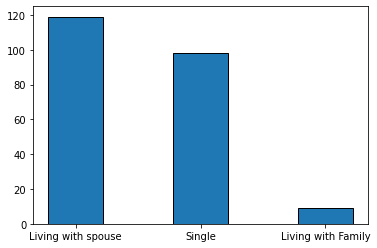

In [78]:
width = 0.35
x = [0, 0.8, 1.6]
situation_counts=nutri['situation'].value_counts()
plt.bar(x, situation_counts, width, edgecolor = 'black')
plt.xticks(x, situation_counts.index)
plt.show()

# Plotting Quantitative Variables

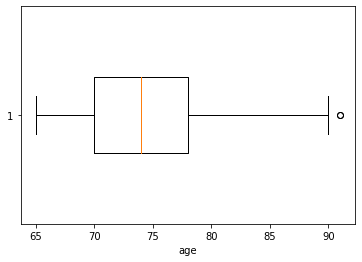

In [79]:
plt.boxplot(nutri['age'], widths=width, vert=False)
plt.xlabel('age')
plt.show()

# Here vert=False plots the boxplot horizontally. 
# This boxplot summarises the data using 5 quantitaties, min, max, first, second, and third quantiles. 
# We can also see the location of the median from the red vertical line.

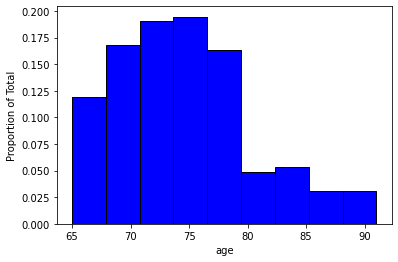

In [80]:
weights = np.ones_like(nutri.age)/nutri['age'].count()
plt.hist(nutri.age, bins=9, weights=weights, facecolor = 'blue', edgecolor='black', linewidth=1)
plt.xlabel('age')
plt.ylabel('Proportion of Total')
plt.show()

# The first line creates an array of the proportion of the ages of the total.

# Bivariate Data Visualisation

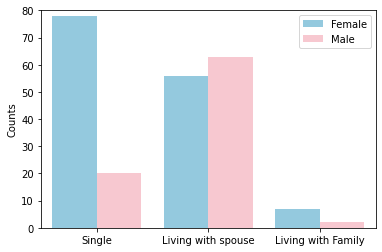

In [81]:
sns.countplot(x='situation', hue = 'gender', data=nutri, palette = ['skyblue', 'pink'])
plt.legend(loc='upper right')
plt.xlabel('')
plt.ylabel('Counts')
plt.ylim(0,80)
plt.show()

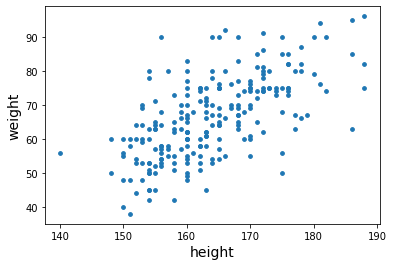

In [82]:
plt.scatter(nutri.height, nutri.weight, s=14, marker='o')
plt.xlabel('height', fontsize=14)
plt.ylabel('weight', fontsize = 14)
plt.show()

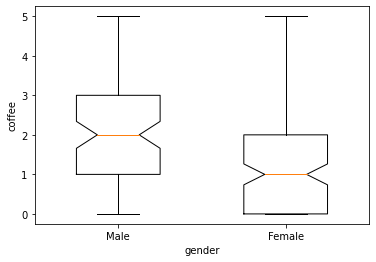

In [83]:
males = nutri[nutri.gender == 'Male']
females = nutri[nutri.gender == 'Female']
plt.boxplot ([ males.coffee ,females.coffee],notch=True ,widths
=(0.5 ,0.5))
plt.xlabel('gender')
plt.ylabel('coffee')
plt.xticks ([1 ,2] ,['Male','Female'])
plt.show ()